# Лабораторная работа № 2
## Мусаев Артур
## А-13а-20
### Вариант № 16

Импортируем библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Задание 2.1


Методом простой итерации найти вещественные корни алгебраического уравнения $ P(x)=0 $ с точностью $ \varepsilon = 10^{-8} $  .

$ P(x) = 0.9x^3 + 3.5x^2 -0.3x - 4 $

In [2]:
def P(x):
    return 0.9 * (x ** 3) + 3.5 * x * x - 0.3 * x - 4

Построим график функции:

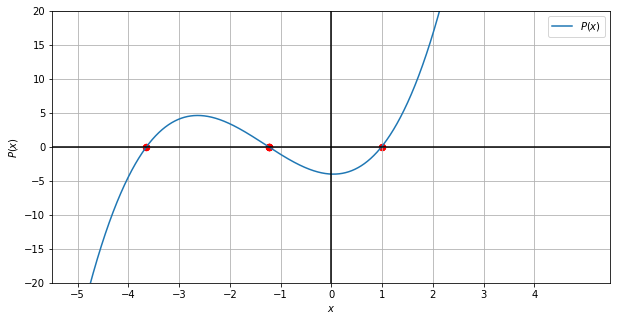

In [3]:
x_data = np.arange(-5, 5, 0.0001)


plt.figure(figsize=(10, 5))
plt.plot(x_data, P(x_data), label = '$P(x)$')


epsilon = 1e-3
mask = np.abs(P(x_data)) < epsilon
plt.scatter(x_data[mask], P(x_data)[mask], color='red', s=40, marker='o')


ax = plt.gca()

ax.axhline(y=0, color='k')   
ax.axvline(x=0, color='k')
ax.set_ylim(-20, 20)

plt.xticks(np.arange(min(x_data), max(x_data), 1))

plt.grid(True)

plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')

plt.legend()
plt.show()

Как видно из графика, у уравнения 3 корня: $ x_1 \in [-4; -3], x_2 \in [-2; -1], x_3 \in [0.5; 1.5] $

Найдём производную:

In [4]:
def P_der(x):
    return 2.7*x*x + 7*x -0.3

$ P'(x) = 2.7x^2 + 7x -0.3 $

Построим график производной:

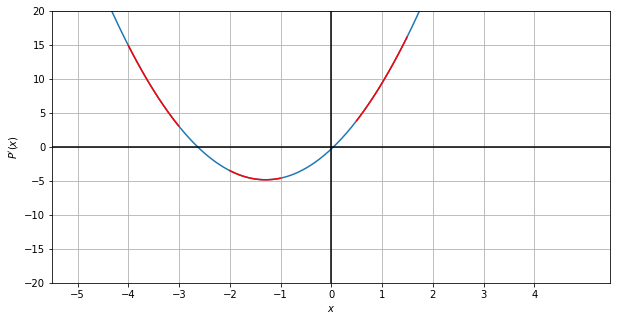

In [5]:
plt.figure(figsize=(10, 5))

t1 = np.arange(-4, -3, 0.01)
t2 = np.arange(-2, -1, 0.01)
t3 = np.arange(0.5, 1.5, 0.01)

plt.plot(x_data, P_der(x_data), t1, P_der(t1), 'r', t2, P_der(t2), 'r',  t3, P_der(t3), 'r')

ax = plt.gca()

ax.axhline(y=0, color='k')   
ax.axvline(x=0, color='k')
ax.set_ylim(-20, 20)

plt.xticks(np.arange(min(x_data), max(x_data), 1))
#plt.yticks(np.arange(-20, 20, 2))

plt.grid(True)

plt.xlabel(r'$x$')
plt.ylabel(r"$P'(x)$")

plt.show()

Как видно из графика, производная не меняет знак на отрезках локализации.

Найдём параметры $ \alpha $ и $ q $

In [6]:
#max P'(x), x in [a, b]
M1 = [15, -3.5, 16.3]
#min P'(x), x in [a, b]
m1 = [3, -5, 4]

a = [0, 0, 0]
q = [0, 0, 0]

for i in range(3):
    a[i] = (2/(M1[i]+m1[i]))
    q[i] = np.abs((M1[i]-m1[i])/(M1[i]+m1[i]))

print('Итерационный параметр a для каждого корня: ', a)
print('Параметр q для каждого корня: ', q)


Итерационный параметр a для каждого корня:  [0.1111111111111111, -0.23529411764705882, 0.09852216748768472]
Параметр q для каждого корня:  [0.6666666666666666, 0.17647058823529413, 0.6059113300492611]


Напишем программу для поиска корня методом простой итерации:

In [7]:
def iteration(x, a, eps):
    it = 0
    buf = x - a*P(x)
    while np.abs(x - buf) > eps:
        x = buf
        buf = x - a*P(x)
        it += 1
    return (x, it)

In [8]:
#Зададим начальное приближение:
x = [-3.5, -1.5, 1] 

it = [0, 0, 0]

eps = 1e-8

for i in range(3):
    x[i], it[i] = iteration(x[i], a[i], eps)
print('Корни: ', x)
print('Количество итераций: ', it)

Корни:  [-3.645972090096248, -1.2322029113777988, 0.9892861132524818]
Количество итераций:  [7, 9, 6]


Таким образом, $ x_1 \approx -3.645972090096248, x_2 \approx -1.2322029113777988, x_3 \approx 0.9892861132524818 $

| Мусаев Артур Шухратович                                                        А-13а-20 |            |      |    |         |        | Номер   варианта: 16        |
|-----------------------------------------------------------------------------------------|------------|------|----|---------|--------|-----------------------------|
|                                                                                         |            |      |    |         |        |                             |
| Уравнение: $ P(x) = 0.9x^3 + 3.5x^2 -0.3x - 4 $                                         |            |      |    |         |        |                             |
|  Корни:                                                                                 | [a,b]      | M1   | m1 | a       | q      | Корень с заданной точностью |
|                                                                                         |            |      |    |         |        | Число   итераций            |
| 1-ый   корень                                                                           |  [-4,3]    |  15  | 3  | 0.1111  | 0.6667 | -3.64597209 7               |
| 2-ой   корень                                                                           |  [-2;-1]   | -3.5 | -5 | -0.2353 | 0.1765 | -1.23220291 9               |
| 3-ий корень                                                                             | [0.5; 1.5] | 16.3 | 4  | 0.0985  | 0.6059 | 0.98928611 6                |

### Задание 2.2

Дано уравнение $ f(x) $ Найти все  корни уравнения с заданной точностью $ \varepsilon = 10^{-12} $ на указанном отрезке [a,b].
Для решения задачи использовать метод Ньютона и метод, указанный в индивидуальном варианте.
Сравнить количество итераций, потребовавшихся для достижения заданной точности каждым методом.

$ f(x) = 2 \sqrt{x} \sin(x) - \cos(4x) - 2 $\
[a;b] = [0;8]

In [9]:
def f(x):
    return 2 * np.sqrt(x) * np.sin(x) - np.cos(4*x) - 2

Построим график функции:

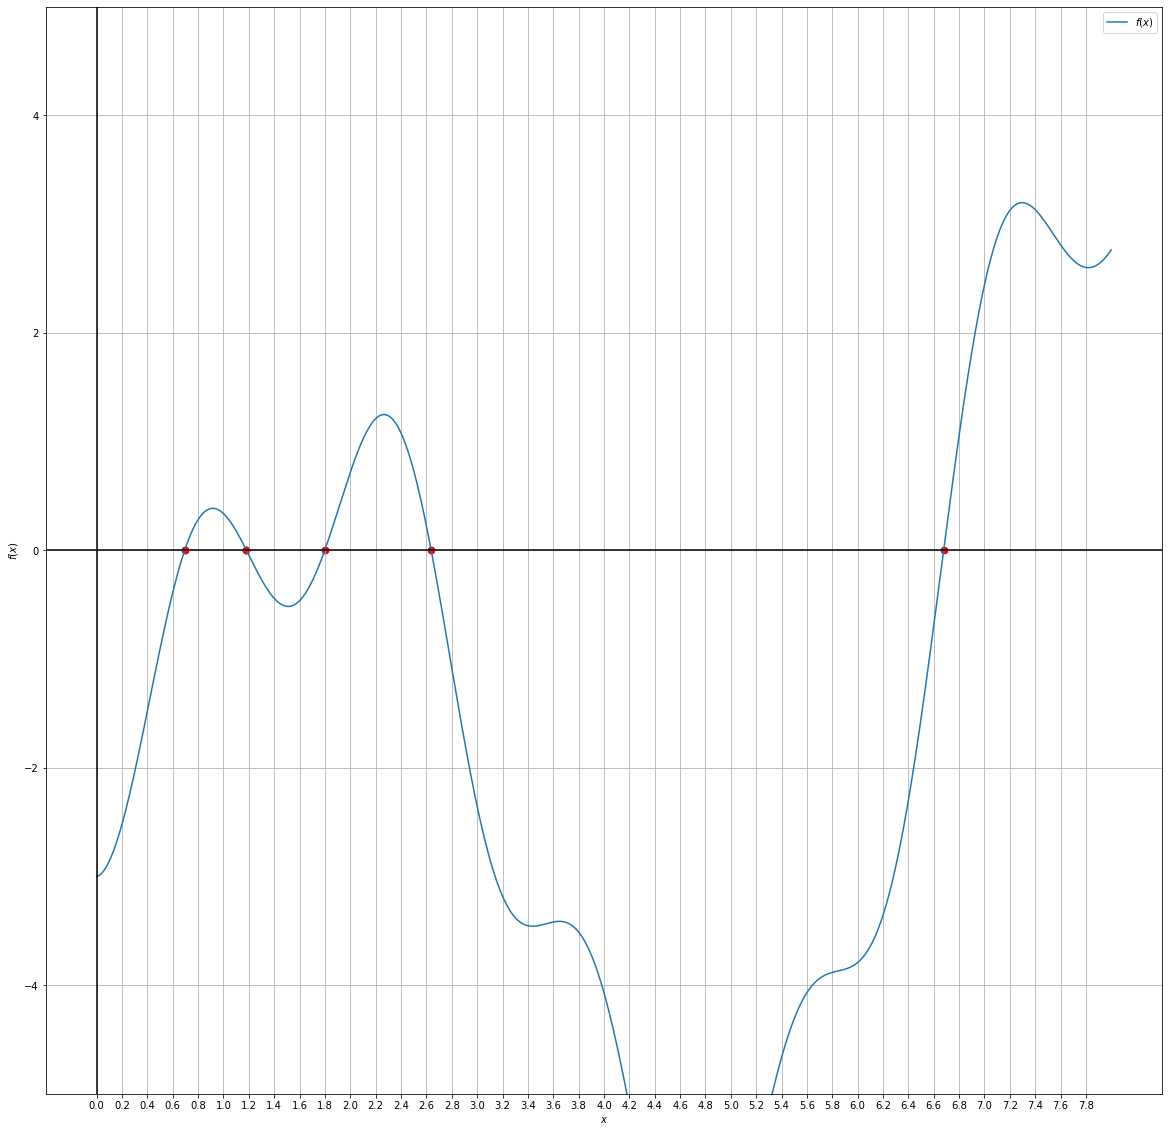

In [10]:
x_data = np.arange(0, 8, 0.0001)


plt.figure(figsize=(20, 20))
plt.plot(x_data, f(x_data), label = '$f(x)$')


epsilon = 0.001
mask = np.abs(f(x_data)) < epsilon
plt.scatter(x_data[mask], f(x_data)[mask], color='red', s=40, marker='o')


ax = plt.gca()

ax.axhline(y=0, color='k')   
ax.axvline(x=0, color='k')
ax.set_ylim(-5, 5)

plt.xticks(np.arange(min(x_data), max(x_data), 0.2))

plt.grid(True)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

plt.legend()
plt.show()

Итого имеем, 5 корней $ \in [0;8] $\
$ x_1 \in [0.6;0.8] $ \
$ x_2 \in [1.0;1.2] $ \
$ x_3 \in [1.6;1.8] $ \
$ x_4 \in [2.6;2.8] $ \
$ x_5 \in [6.6;6.8] $ 

Найдём производную заданной функции:

In [11]:
def f_der(x):
    return np.sin(x)/np.sqrt(x) + 2 * np.sqrt(x) * np.cos(x) + 4 * np.sin(4*x)

Метод Ньютона:

In [12]:
def Newton(x, eps):
    it = 0
    buf = x - f(x)/f_der(x)
    while np.abs(x-buf) > eps:
        x = buf
        buf = x - f(x)/f_der(x)
        it += 1
    return (x, it)

Запишем начальные значения для каждого корня(как середина отрезка локализации) и найдём корни:

In [13]:
x_n = [0.7, 1.1, 1.7, 2.7, 6.7]
it_n = [0, 0, 0, 0, 0]
eps = 1e-12
for i in range (5):
    x_n[i], it_n[i] = Newton(x_n[i], eps)

Корни уравнения и количество итераций методом Ньютона:

In [14]:
print(x_n)
print(it_n)

[0.6941152173522169, 1.1804942827683127, 1.7985526680311321, 2.6374739723035856, 6.678402771180849]
[3, 4, 4, 4, 3]


Найдем корни методом простой итерации. Построим график производной и проверим не меняет ли производная знак на локализованных отрезках:

C:\Users\armus\AppData\Local\Temp\ipykernel_10056\2920723037.py:2: RuntimeWarning: invalid value encountered in true_divide
  return np.sin(x)/np.sqrt(x) + 2 * np.sqrt(x) * np.cos(x) + 4 * np.sin(4*x)


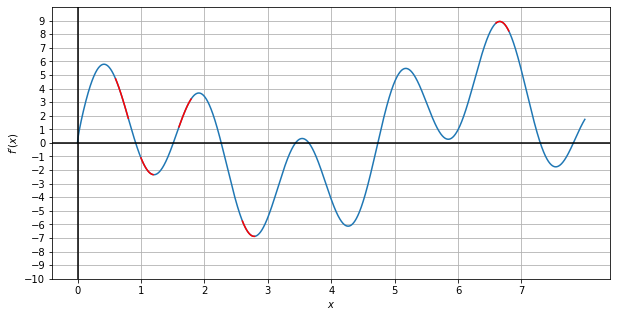

In [38]:
plt.figure(figsize=(10, 5))

t1 = np.arange(0.6, 0.8, 0.01)
t2 = np.arange(1.0, 1.2, 0.01)
t3 = np.arange(1.6, 1.8, 0.01)
t4 = np.arange(2.6, 2.8, 0.01)
t5 = np.arange(6.6, 6.8, 0.01)

plt.plot(x_data, f_der(x_data), t1, f_der(t1), 'r', t2, f_der(t2), 'r',  t3, f_der(t3), 'r',  t4, f_der(t4), 'r',  t5, f_der(t5), 'r')

ax = plt.gca()

ax.axhline(y=0, color='k')   
ax.axvline(x=0, color='k')
ax.set_ylim(-10, 10)

plt.xticks(np.arange(min(x_data), max(x_data), 1))
plt.yticks(np.arange(-10, 10, 1))

plt.grid(True)

plt.xlabel(r'$x$')
plt.ylabel(r"$f'(x)$")

plt.show()

Как видно из графика, производная не меняет знак на локализованных отрезках.

Найдём параметры $ \alpha $ и $ q $

In [16]:
#max P'(x), x in [a, b]
M1 = [5, -1, 3, -6, 8]
#min P'(x), x in [a, b]
m1 = [2, -2, 1, -7, 7]

a = [0, 0, 0, 0, 0]
q = [0, 0, 0, 0, 0]

for i in range(5):
    a[i] = (2/(M1[i]+m1[i]))
    q[i] = np.abs((M1[i]-m1[i])/(M1[i]+m1[i]))

print('Итерационный параметр a для каждого корня: ', a)
print('Параметр q для каждого корня: ', q)


Итерационный параметр a для каждого корня:  [0.2857142857142857, -0.6666666666666666, 0.5, -0.15384615384615385, 0.13333333333333333]
Параметр q для каждого корня:  [0.42857142857142855, 0.3333333333333333, 0.5, 0.07692307692307693, 0.06666666666666667]


Воспользуемся программой из 2.1:

In [17]:
def iteration2(x, a, eps):
    it = 0
    buf = x - a*f(x)
    while np.abs(x - buf) > eps:
        x = buf
        buf = x - a*f(x)
        it += 1
    return (x, it)

In [18]:
#Зададим начальное приближение:
x = [0.7, 1.1, 1.7, 2.7, 6.7]

it = [0, 0, 0, 0, 0]

eps = 1e-12

for i in range(5):
    x[i], it[i] = iteration2(x[i], a[i], eps)
print('Корни: ', x)
print('Количество итераций: ', it)

Корни:  [0.6941152173524393, 1.1804942827687077, 1.798552668030698, 2.6374739723045186, 6.678402771180545]
Количество итераций:  [5, 43, 58, 8, 15]


|  |  |  |
|---|---|---|
| Уравнение   f(x) = 2sqrtx * sin(x) - cos(4x) - 2   |   Задача 2.2 |                   |
|           Корни уравнения    |     Число итераций      метода Ньютона          |      Число итераций      метода простой итерации |
| 1-ый корень |   3        | 5 |
| 2-ой корень   |   4   | 43 |
| 3-ий корень | 4 | 58 |
| 4-ый корень | 4 | 8 |
| 5-ый корень | 3 | 15 |

Вывод:
Метод Ньютона позволяет найти корень быстрее, а метод простой итерации заставляет нас сделать большее число итераций.

Корни, найденные с заданной точностью равны, значит методы были составлены верно;

Метод Ньютона не дает чрезмерно большого числа итераций, значит у функции отсутствуют кратные корни на интервале, она непрерывно дифференцируема и отрезки локализации заданы верно.


Модифицируем функции:

In [34]:
def Newton_mod(x, it):
    it_buf = 0
    buf = x - f(x)/f_der(x)
    r = []
    while it_buf != it:
        r.append(abs(f(x)))
        x = buf
        buf = x - f(x)/f_der(x)
        it_buf += 1
    return r

In [35]:
def Iteration_mod(x, a ,it):
    it_buf = 0
    buf = x - a*f(x)
    r = []
    while it_buf != it:
        r.append(abs(f(x)))
        x = buf
        buf = x - a*f(x)
        it_buf += 1
    return r

Графики:

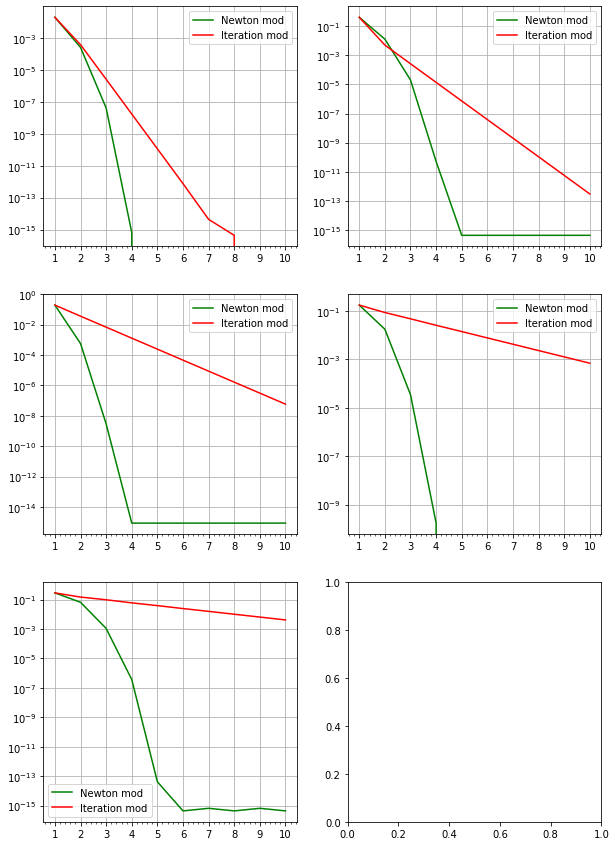

In [36]:
x_n = [0.7, 1.1, 1.7, 2.7, 6.7]
x = [0.7, 1.1, 1.7, 2.7, 6.7]
iterations = np.arange(1, 11, 1)
fig, ax = plt.subplots(3, 2, figsize=(10,15), squeeze=False)
for i in range(5):
    ax[(i % 3), (i % 2)].plot(iterations, Newton_mod(x_n[i], iterations.size),  color = 'green', label = 'Newton mod')
    ax[(i % 3), (i % 2)].plot(iterations, Iteration_mod(x[i], a[i], iterations.size),  color = 'red', label = 'Iteration mod')
    ax[(i % 3), (i % 2)].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[(i % 3), (i % 2)].minorticks_on()
    ax[(i % 3), (i % 2)].grid(True)
    ax[(i % 3), (i % 2)].legend()
    ax[(i % 3), (i % 2)].set_yscale('log')




Метод Ньютона почти сразу же достигает нулевого значения. Это обуславливается квадратичной сходимостью. Метод простой итерации линейно стремится вниз. Отсюда линейная сходимость

### Задача 2.3

Найти корни уравнения и определить их кратность.

$ f(x) = 144(2-\sqrt{3})ctg(x) - 48 \pi + 96(2+\sqrt{3}) \pi x - 144 + 576x - (2 + \sqrt{3})(576x^2 + 4 {\pi}^2 $) 

Напишем функцию:

In [22]:
def f2(x):
    return 144*(2-np.sqrt(3))/np.tan(x) - 48 * np.pi + 96*(2+np.sqrt(3))*np.pi*x - 144 + 576 * x - (2+np.sqrt(3))*(576*x*x + 4 * (np.pi)**2)

Теперь найдём первую и вторую производную:

$ f'(x) = - \frac{144(2-\sqrt{3})}{\sin^2x} + 96(2+\sqrt{3}) \pi + 576 - (2 + \sqrt{3})1152x $ \
$ f''(x) = \frac{288(2-\sqrt{3})cosx}{\sin^3x} - (2 + \sqrt{3})1152 $

Соответственно:

In [23]:
def df2(x):
    return -144*(2-np.sqrt(3))/(np.sin(x))**2 + 96*(2+np.sqrt(3))*np.pi + 576 - (2+np.sqrt(3))*1152*x

In [24]:
def ddf2(x):
    return 288*(2-np.sqrt(3))*np.cos(x)/(np.sin(x))**3 - (2+np.sqrt(3))*1152

Построим графики

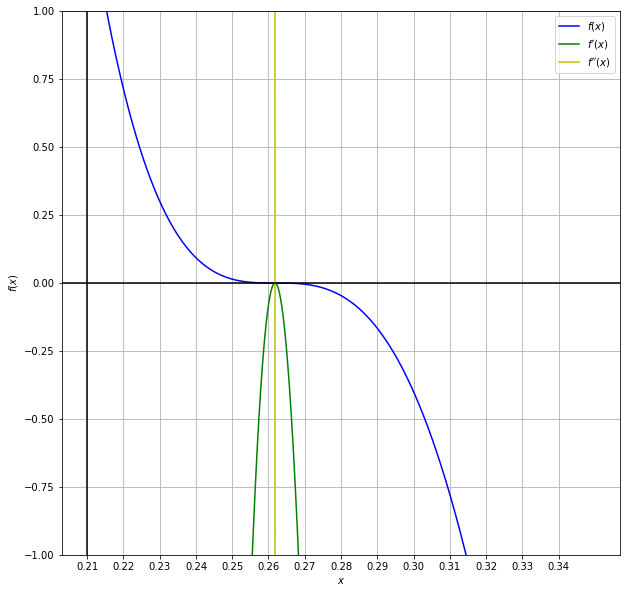

In [40]:
x_data = np.arange(0.21, 0.35, 0.0001)


plt.figure(figsize=(10,10))
plt.plot(x_data, f2(x_data), 'b', label = '$f(x)$')
plt.plot(x_data, df2(x_data), 'g', label = "$f'(x)$")
plt.plot(x_data, ddf2(x_data), 'y', label = "$f''(x)$")





ax = plt.gca()

ax.axhline(y=0, color='k')   
ax.axvline(x=0.21, color='k')
ax.set_ylim(-1, 1)
plt.xticks(np.arange(min(x_data), max(x_data), 0.01))

plt.grid(True)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

plt.legend()
plt.show()

Из графика видно, что корень фнкции является корнем кратности 3.

Напишем модифицированный метод Ньютона:

In [26]:
def mod_new(x, m, eps):
    it = 0
    buf = x - m*f2(x)/df2(x)
    while np.abs(x-buf) > eps:
        x = buf
        buf = x - m*f2(x)/df2(x)
        it += 1
    return (x, it)
    

Найдём корень уравнения:

In [27]:
x_n = 0.26
mod_new(x_n, 3, 1e-12)

(0.2617993570859763, 4)

Попробуем использовать другие коэффициенты:

In [33]:
x_n = 0.26
print(mod_new(x_n, 2, 1e-12))
print(mod_new(x_n, 1, 1e-12))

(0.2618011805192874, 15)
(0.26179843799510005, 17)


Таким образом, корень действительно имеет кратность три, так как при использовании такой кратности, метод сходится всего за 4 итерации